In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Load the CSV file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from statistics import mean, stdev
from itertools import combinations

log_file = "C:\\Users\\ekuep\\Desktop\\ols_logs_aggreg.txt"
csv_file = "C:\\Users\\ekuep\\Desktop\\rsquared_values.csv"
file_path = "Q:\\main_propellab\\Users\\Ng, Gabe\\Summer Student 2024\\Rhythmic Stimulation Gait Similarity Project\\Analysis and Results\\Updated_DataSplitting\\GPS\\3Levels_Trial1\\logresults_22-07-24_11-20.csv"


In [3]:
#For each participant, applies a regression across change in stance time symmetry to change in similarity score
#Runs through all combinations of algorithms and sensor combinations.

data = pd.read_csv(file_path)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['X'] = pd.to_numeric(data['X'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')


def percent_difference(values):
    base_value = values.iloc[0]  # Take the first value as base
    return [math.ceil(abs(value - base_value)) for value in values]

def plot_scatter_and_regress(data, algorithm, participant, sensor):
    subset = data[(data['Algorithm'] == algorithm) & 
                  (data['Participant'] == participant) & 
                  (data['Sensor'] == sensor)]
    #print(f'Generating plot and regression for {algorithm}, {participant}, {sensor}, number of data points: {len(subset)}')
    
    if not subset.empty:
        subset['Percent_Difference'] = percent_difference(subset['X'])
        X = subset['Percent_Difference'].values
        subset['Ydiff'] = subset['Y'] - subset['Y'].iloc[0]
        Y = subset['Ydiff'].values
        subset_df = pd.DataFrame({'X': X, 'Y': Y})
        model = ols('Y~X',data=subset_df)
        results = model.fit()

        # with open(log_file, 'a') as f:
        #     f.write(f'Regression results for {algorithm}, {participant}, {sensor}:\n')
        #     f.write(results.summary().as_text() + '\n\n')
        
        # rsquared = results.rsquared
        
        # with open(csv_file, 'a') as f:
        #     f.write(f'{algorithm},{participant},{sensor},{rsquared}\n')    
            
        # #print(results.summary2())
        # plt.figure()
        # plt.scatter(X, Y, label=f'{algorithm}-{participant}-{sensor}')
        # sns.regplot(x='X',y='Y',data = subset_df,ci=None)
        # plt.text(x=subset_df['X'].min(), y=subset_df['Y'].max(), s=f'$R^2 = {rsquared:.2f}$')
        # plt.xticks(X)
        # plt.ylabel('Change in Similarity')
        # plt.xlabel('% Change in Stance Time Symmetry')
        # plt.title(f'Scatter Plot and Regression for {algorithm}, {participant}, {sensor}')
        # plt.savefig(f'C:\\Users\\ekuep\Desktop\\{algorithm}-{participant}-{sensor}.png')
        
    else:
        print(f'No data available for {algorithm}, {participant}, {sensor}')

participants = data['Participant'].unique()
sensors = data['Sensor'].unique()
algorithms = data['Algorithm'].unique()

for participant in participants:
    for sensor in sensors:
        for algorithm in algorithms:
            plot_scatter_and_regress(data, algorithm, participant, sensor)


C:\Users\ekuep\AppData\Local\Temp\ipykernel_20252\825065659.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Percent_Difference'] = percent_difference(subset['X'])
C:\Users\ekuep\AppData\Local\Temp\ipykernel_20252\825065659.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Ydiff'] = subset['Y'] - subset['Y'].iloc[0]
C:\Users\ekuep\AppData\Local\Temp\ipykernel_20252\825065659.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Generating plot and regression for DTW, pelvis, number of data points: 44
     Baseline          0          1          2
0   14.764979   14.35105  14.550493  15.031108
1   15.026453  14.746693    15.4719  16.216606
2    9.739582   9.976272   9.950181    10.0492
3   13.452266  13.134759   13.33487  13.569719
4   17.607776  17.570619  17.659712  18.426244
5   17.195706  16.940822  17.517415  17.637856
6   12.527799  12.459256  12.827071  12.686412
7   13.062188  13.016465  12.999193  13.090769
8   11.255674  11.351468  11.221741  12.400266
9   15.062479  15.169041  15.115675  16.159514
10  14.495939  14.506487  14.629314  15.857724
Columns for comparison: ['Baseline', '0', '1', '2']
Pairs for comparison: [('Baseline', '0'), ('Baseline', '1'), ('Baseline', '2'), ('0', '1'), ('0', '2'), ('1', '2')]
T-Test Results: {'Baseline_vs_0': {'t_statistic': 0.08954792519720331, 'p_value': 0.9295386287904692}, 'Baseline_vs_1': {'t_statistic': -0.09793539195015903, 'p_value': 0.9229586141375248}, 'Bas

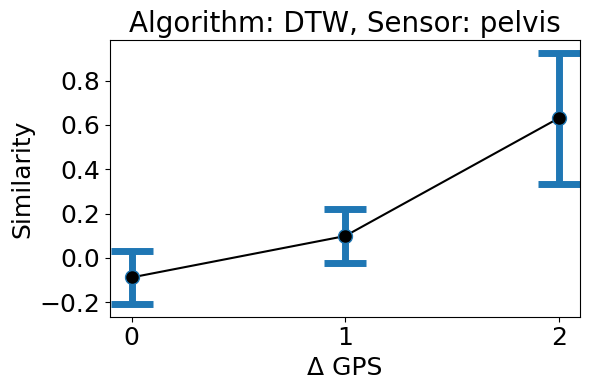

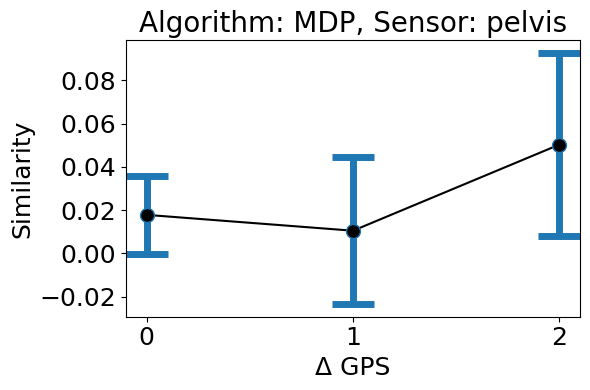

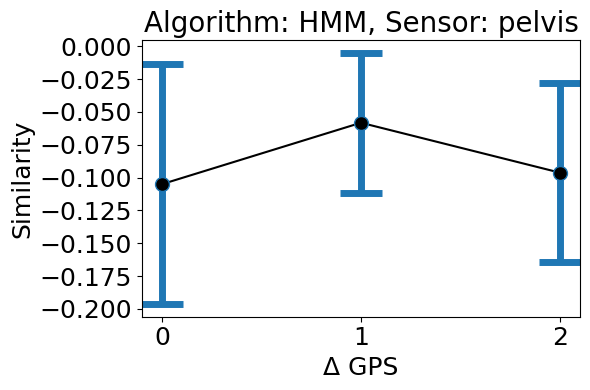

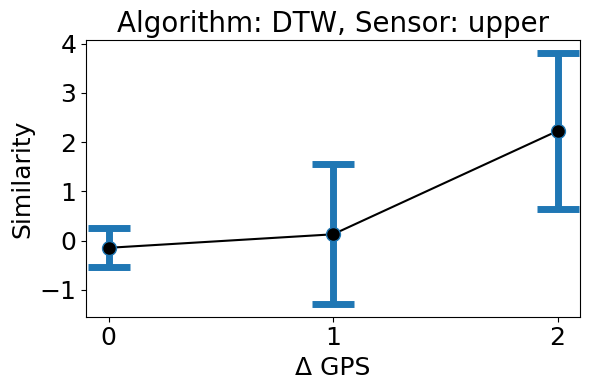

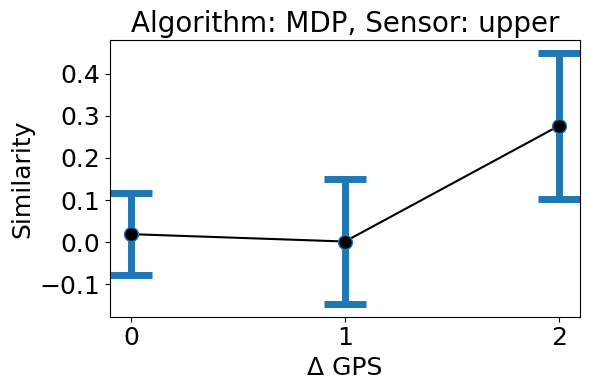

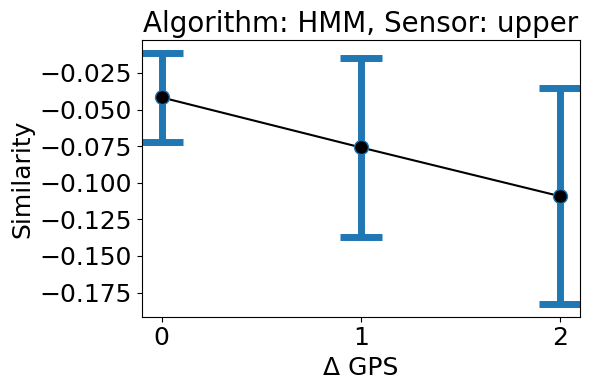

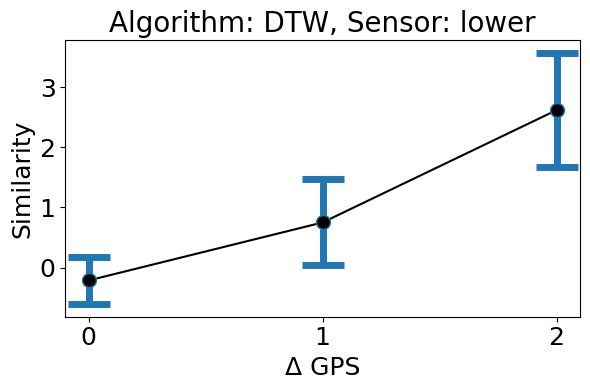

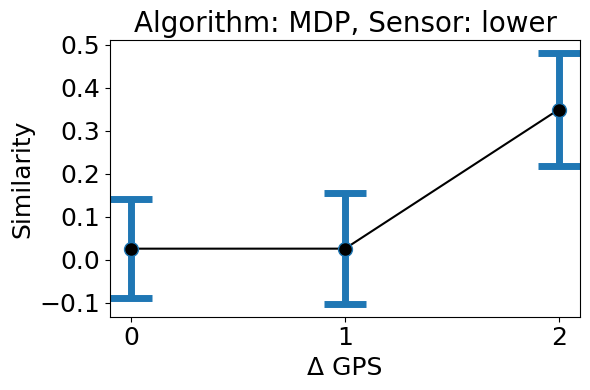

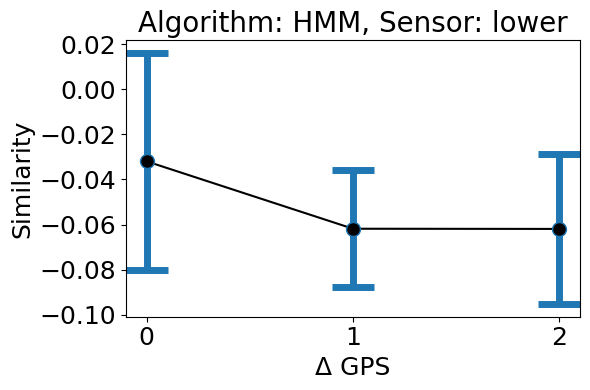

In [15]:
#Aggregates participants together for a given algorithm and sensor config result. Options for computing SRM, Cohen's d, Welch's t-test, etc.
file_path = r"q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\STSR\STSR_10HMMs_3states_secondbaseline\logresults_16-07-24_19-52.csv"
data = pd.read_csv(file_path,header=None)
data.columns = ['FilePath', 'Sensor', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
#data['X'] = pd.to_numeric(data['X'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

def calculate_srm(col1, col2):
    # Filter out None values
    valid_indices = ~col1.isna() & ~col2.isna()
    if np.any(valid_indices):
        mean_diff = np.mean(col1[valid_indices] - col2[valid_indices])
        std_diff = np.std((col1[valid_indices] - col2[valid_indices]),ddof=1)
        return mean_diff / std_diff
    else:
        return np.nan  # Return NaN if no valid values are present

def calculate_cohens_d(group1, group2):
    mean_diff = mean(group1) - mean(group2)
    pooled_std = np.sqrt((stdev(group1)**2 + stdev(group2)**2) / 2)
    return mean_diff / pooled_std

# Function to plot scatter plots and regression
def plot_scatter_and_regress(data, algorithm, sensor, csv_file):
    
    csv_file = r"q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\STSR\STSR_10HMMs_3states_secondbaseline\\\SRM_values.csv"
    csv_file2 = r"q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\STSR\STSR_10HMMs_3states_secondbaseline\\\ttest_pairedvalues_GPS.csv"
    csv_file3 = r"q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\STSR\STSR_10HMMs_3states_secondbaseline\\CohensD_values.csv"
    
    subset = data[(data['Algorithm'] == algorithm) & 
                  (data['Sensor'] == sensor)]
    print(f'Generating plot and regression for {algorithm}, {sensor}, number of data points: {len(subset)}')
    
    if not subset.empty:
        
        # df = pd.DataFrame(columns=['0', '0.03', '0.06'], index=range(10))  # Initialize outside the loop
        # df2 = pd.DataFrame(columns=['0', '0.03', '0.06'], index=range(10))  # Initialize outside the loop
        
        df = pd.DataFrame(columns=['Baseline', '0', '1','2'], index=range(len(subset['Participant'].unique())))  # Initialize outside the loop
        df2 = pd.DataFrame(columns=['Baseline', '0', '1','2'], index=range(len(subset['Participant'].unique())))  # Initialize outside the loop
        for i, participant in enumerate(subset['Participant'].unique()):
            participant_data = subset[subset['Participant'] == participant].copy()
            participant_data['Y_diff'] = participant_data['Y'] - participant_data['Y'].iloc[0]
            Y = participant_data['Y'].values.tolist()
            Y_diff = participant_data['Y_diff'].values.tolist()
            
            # df.loc[i] = Y
            # df2.loc[i] = Y_diff
            if len(Y) == 3:
                df.loc[i] = Y + [None]  # Add None to make it 4 elements
                df2.loc[i] = Y_diff + [None]
            elif len(Y) == 4:
                df.loc[i] = Y
                df2.loc[i] = Y_diff
        
        print(df)
        srm_results = {}
        t_test_results = {}
        cohen_d_results = {}
        
        start_column = 'Baseline'
        for col in df.columns:
            if col != start_column and not df[col].isna().all():  # Ignore '0%' column and columns with all None values
                # Ensure numeric data and drop NaNs
                data1 = df[start_column].dropna().astype(float)
                data2 = df[col].dropna().astype(float)
                
                # Calculate SRM
                srm_value = calculate_srm(data1, data2)
                srm_results[col] = srm_value
                
                # # Perform Welch's t-test
                # t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
                # t_test_results[col] = {'t_statistic': t_stat, 'p_value': p_val}
                
                # Calculate Cohen's d
                # cohen_d = calculate_cohens_d(data1, data2)
                # cohen_d_results[col] = cohen_d
        
        columns = [col for col in df.columns if not df[col].isna().all()]

        # Check if columns list is correct
        print(f"Columns for comparison: {columns}")

        # Generate all unique pairs of columns
        pairs = list(combinations(columns, 2))
        excluded_pairs = [('0', '1'), ('0', '2')]
        filtered_pairs = [pair for pair in pairs if pair not in excluded_pairs]
        # Check if pairs list is correct
        print(f"Pairs for comparison: {pairs}")
        for col1, col2 in filtered_pairs:
            # Ensure numeric data and drop NaNs
            data1 = df[col1].dropna().astype(float)
            data2 = df[col2].dropna().astype(float)

            # Perform Welch's t-test
            t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
            t_test_results[f'{col1}_vs_{col2}'] = {'t_statistic': t_stat, 'p_value': p_val}
            
        print("T-Test Results:", t_test_results)               
        #Append results to CSV file
        with open(csv_file, "a") as csv_file:
            for key, value in srm_results.items():
                csv_file.write(f"{algorithm},{sensor},{key},{value}\n") 
        
        with open(csv_file2, "a") as csv_file2:
            for key, value in t_test_results.items():
                csv_file2.write(f"{algorithm},{sensor},{key},{value}\n") 
                
        # with open(csv_file3, "a") as csv_file3:
        #     for key, value in cohen_d_results.items():
        #         csv_file3.write(f"{algorithm},{sensor},{key},{value}\n") 
        
        #Use the second dataframe for the plotting        
        mean_values = df2.mean()
        sem_values = df2.sem()  # Standard error of the mean
        x_labels = df.columns
        plt.figure(figsize=(6,4))
        # plt.errorbar(x_labels[1:], mean_values[1:], yerr=1.96 * sem_values[1:], fmt='o', capsize=15, linewidth=5,markersize=10,capthick=5) #font size 26 -- option used to generate figures for pres.
        plt.errorbar(x_labels[1:], mean_values[1:], yerr=1.96 * sem_values[1:], fmt='o',capsize=15,linewidth=5,markersize=10,capthick=5,markerfacecolor='black')
        plt.plot(x_labels[1:], mean_values[1:], linestyle='-', color='black')
        plt.xlabel('Δ GPS',fontsize=18)
        plt.ylabel('Similarity',fontsize=18)
         #Adjust title based on conditions

        if sensor == "UpperLeg":
            title_sensor = "Upper Leg"
        else:
            title_sensor = sensor
        
        if algorithm == "HMM-SM":
            title_algorithm = "HMM"

        else:
            title_algorithm = algorithm
        plt.title(f"Algorithm: {title_algorithm}, Sensor: {title_sensor}", fontsize=20)
        
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        
        plt.tick_params(axis='y')
        plt.tick_params(axis='x')
        
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        plt.tight_layout()
        #plt.savefig(f"C:\\Users\\ekuep\\Desktop\\changefrombaseline_STSR_{algorithm}_{sensor}.png")  # Save plot
        
# Get unique combinations of sensors and algorithms
sensors = data['Sensor'].unique()
algorithms = data['Algorithm'].unique()

# Plot for each combination of sensor and algorithm
for sensor in sensors:
    for algorithm in algorithms:
        plot_scatter_and_regress(data, algorithm, sensor, csv_file)

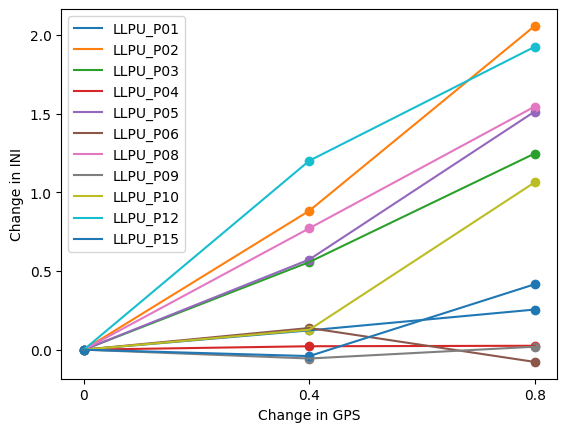

            0          1          2
0    8.511521   8.634133   8.766414
1    9.148543  10.030791  11.205134
2    7.430692   7.987417   8.676827
3    9.358731   9.380516   9.383593
4   11.805593  12.378331  13.318497
5   10.811579  10.949256  10.733829
6    9.090563   9.861644  10.634951
7    5.948661   5.892576   5.967527
8    7.209139   7.335919   8.272248
9   15.770495  16.970694  17.694519
10   6.838129     6.7974   7.253652
{'1': -0.9128188463186925, '2': -1.1281534229768115}
Columns for comparison: ['0', '1', '2']
Pairs for comparison: [('0', '1'), ('0', '2'), ('1', '2')]
T-Test Results: {'0_vs_1': {'t_statistic': -0.3134753102368531, 'p_value': 0.7572017599623879}, '0_vs_2': {'t_statistic': -0.711498989687488, 'p_value': 0.4851694564513277}, '1_vs_2': {'t_statistic': -0.38631554583221794, 'p_value': 0.7033493879224497}}


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Load the CSV file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from statistics import mean, stdev
from itertools import combinations

# Define the SRM calculation function
def calculate_srm(col1, col2):
    # Filter out None values
    valid_indices = ~col1.isna() & ~col2.isna()
    if np.any(valid_indices):
        mean_diff = np.mean(col1[valid_indices] - col2[valid_indices])
        std_diff = np.std((col1[valid_indices] - col2[valid_indices]), ddof=1)
        return mean_diff / std_diff
    else:
        return np.nan  # Return NaN if no valid values are present
file = r"Q:\main_propellab\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\IMU_Based_Gait_Normalcy\GPS\logresults_GPS_INI_BaselineControl02-08-24_13-11.csv"
file.replace("\\", "/")
data = pd.read_csv(file,header=None)
data.columns = ['FilePath', 'GaitParam', 'Algorithm', 'Participant', 'X', 'Y']
data['X'] = pd.to_numeric(data['X'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')


columns=['0', '1','2']
df = pd.DataFrame(columns=['0', '1','2'], index=range(len(data['Participant'].unique())))  # Initialize outside the loop
df2 = pd.DataFrame(columns=['0', '1','2'], index=range(len(data['Participant'].unique())))  # Initialize outside the loop
for i, participant in enumerate(data['Participant'].unique()):
    participant_data = data[data['Participant'] == participant].copy()
    participant_data['Y_diff'] = participant_data['Y'] - participant_data['Y'].iloc[0]
    Y = participant_data['Y'].values.tolist()
    Y_diff = participant_data['Y_diff'].values.tolist()
    X = participant_data['X'].values.tolist()
    X_diff = participant_data['X'] - participant_data['X'].iloc[0]

    if len(Y) < len(columns):
        df.loc[i] = Y + [None]  # Add None to make it 4 elements
        df2.loc[i] = Y_diff + [None]
    else:
        df.loc[i] = Y
        df2.loc[i] = Y_diff
        
        
    columns=['0', '0.4','0.8']
    #plt.plot(Y_diff)
    plt.scatter(columns, Y_diff)
    plt.plot(columns,Y_diff,label=f"{participant}")
    


#plt.ylim([0,10]) 
plt.legend()
plt.xlabel("Change in GPS")
plt.ylabel("Change in INI")
plt.show()   

print(df)
srm_results = {}
t_test_results = {}
cohen_d_results = {}

start_column = '0'
for col in df.columns:
    if col != start_column and not df[col].isna().all():  # Ignore '0%' column and columns with all None values
        # Ensure numeric data and drop NaNs
        data1 = df[start_column].dropna().astype(float)
        data2 = df[col].dropna().astype(float)
        
        # Calculate SRM
        srm_value = calculate_srm(data1, data2)
        srm_results[col] = srm_value
        
        # # Perform Welch's t-test
        # t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
        # t_test_results[col] = {'t_statistic': t_stat, 'p_value': p_val}
        
        # Calculate Cohen's d
        # cohen_d = calculate_cohens_d(data1, data2)
        # cohen_d_results[col] = cohen_d
print(srm_results)
columns = [col for col in df.columns if not df[col].isna().all()]

# Check if columns list is correct
print(f"Columns for comparison: {columns}")

# Generate all unique pairs of columns
pairs = list(combinations(columns, 2))
#excluded_pairs = [('0', '1'), ('0', '2')] #Don't need the comparisons to the second baseline group
#excluded_pairs = [('0', '1')]
#filtered_pairs = [pair for pair in pairs if pair not in excluded_pairs]
filtered_pairs = [pair for pair in pairs]
# Check if pairs list is correct
print(f"Pairs for comparison: {pairs}")
for col1, col2 in filtered_pairs:
    # Ensure numeric data and drop NaNs
    data1 = df[col1].dropna().astype(float)
    data2 = df[col2].dropna().astype(float)

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
    t_test_results[f'{col1}_vs_{col2}'] = {'t_statistic': t_stat, 'p_value': p_val}
    
print("T-Test Results:", t_test_results)               

# #Append results to CSV file
# csv_file =r"Q:\\main_propellab\\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\IMU_Based_Gait_Normalcy\STSR_BaselineControl_SRM.csv"
# csv_file.replace("\\", "/")
# with open(csv_file, "a") as csv_file:
#     for key, value in srm_results.items():
#         csv_file.write(f"{key},{value}\n") 

# csv_file2 =r"Q:\\main_propellab\\Users\Ng, Gabe\Summer Student 2024\Rhythmic Stimulation Gait Similarity Project\Analysis and Results\Updated_DataSplitting\IMU_Based_Gait_Normalcy\STSR_BaselineControl_ttest.csv"
# csv_file2.replace("\\", "/")
# with open(csv_file2, "a") as csv_file2:
#     for key, value in t_test_results.items():
#         csv_file2.write(f"{key},{value}\n") 
                
                